# Lec 20: SVMs
## CMSE 381 - Spring 2024

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1920px-Kernel_Machine.svg.png)

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time


# ML imports we've used previously
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# For today, we just need SVC
from sklearn.svm import SVC 

We now have discussed three related methods in class. The book's definitions as we talked about in class are:

- *Maximal Margin Classifiers*, where the goal was to find a separating hyperplane with no misclassifications, 
- *Support vector classifiers*, where we allow for a soft margin and hence some misclassifications, but only allow for a linear kernel, and 
- *Support vector machines*, where we have a soft margin and an option for kernels. 

It turns out that `sklearn` has only one function to do all of this. A reminder from last time.  **<font color=red>There are two things that will likely be confusing. </font>**
- The command is just called `SVC`, but you should thinking of it as doing the most general SVM as defined in the book and then we can modify our inputs to allow for the other options as necessary.
- The cost input parameter is not the same as the `C` defined in the book. However, it controls the same thing; that is, the amount of tolerance we have for data points on the wrong side of the margin and/or wrong side of the boundary.

The command below is the same as from the last notebook.  The goal is just to be able to draw the boundaries from the SVM easily. 

In [2]:
# Run this cell to define the function
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xvec = np.arange(x_min, x_max, h)
    yvec = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xvec,yvec )
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by X's
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    
    if svc.kernel == 'linear':
        # Get the margin lines 
        w = svc.coef_[0]
        a = -w[0] / w[1]
        yhyperplane = a * xvec - (svc.intercept_[0]) / w[1]
        margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
        ymargin_down = yhyperplane+  - np.sqrt(1 + a ** 2) * margin
        ymargin_up = yhyperplane + np.sqrt(1 + a ** 2) * margin
        plt.plot(xvec,ymargin_down, "k--")
        plt.plot(xvec,ymargin_up, "k--")

    
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

# Swapping out the kernel 

In today's class, we've been discussing changing the kernel function and then learning the model
$$
f(x) = \beta_0 + \sum_{i \in \mathcal{S}}\alpha_i K(x,x_i)
$$

Text(0, 0.5, 'X2')

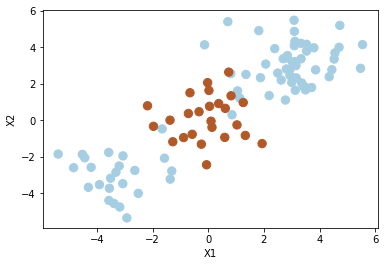

In [3]:
data3 = np.loadtxt('../../DataSets/SVM-Data3.csv')
X = data3[:,:2]
y = data3[:,2]


plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

&#9989; **<font color=red>Do this:</font>** Train a SVC using a radial kernel (this is `kernel = 'rbf'` as input to the `SVC` function) and with $C=1$, $\gamma = 1$. Use the `plot_svc` function to see what the learned boundary looks like. 

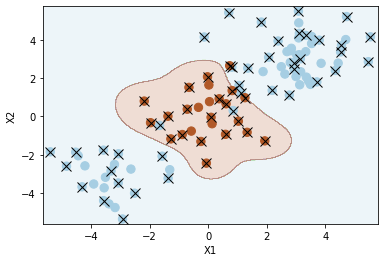

Number of support vectors:  60


In [9]:
# Your code here
clf = SVC(kernel = 'rbf', gamma = 1)
clf.fit(X, y)
plot_svc(clf, X, y, h=0.02, pad=0.25)

&#9989; **<font color=red>Do this:</font>** What happens if you increase $C$ to 100? Is this model looking better or worse than what you had before?

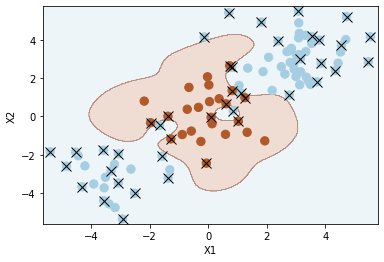

Number of support vectors:  43


In [10]:
# Your code here #

clf = SVC(C=100,gamma=1, kernel = 'rbf')
clf.fit(X, y)
plot_svc(clf, X, y, h=0.02, pad=0.25)

Seems okay ish compared to the other one.

&#9989; **<font color=red>Do this:</font>** Use the `GridSearchCV` function (see the last lab for examples of using it) to determine the best $C$ and $\gamma$ parameters. Use the `plot_svc` function to take a look at the result.

In [20]:
# Your code here
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]
tuned_parameters = [{'C': C_list}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [21]:
clf.best_estimator_

SVC(C=1)

In [19]:
gamma_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]
tuned_parameters = [{'gamma': gamma_list}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.best_estimator_

SVC(gamma=0.1)

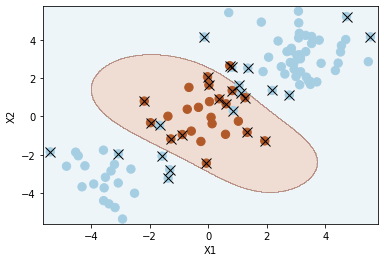

Number of support vectors:  30


In [22]:
clf = SVC(C=1,gamma=0.1, kernel = 'rbf')
clf.fit(X, y)
plot_svc(clf, X, y, h=0.02, pad=0.25)